In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

%matplotlib inline

In [2]:
def calculate_law(y):
    games = pd.read_csv('processed/pbp-summary-{}.csv'.format(y), dtype={'GAME_ID':str})
    winners = pd.read_csv('processed/winners-{}.csv'.format(y), dtype={'GAME_ID':str})
    winners = winners[winners.MATCHUP.str.contains('LAC')]
    together = pd.merge(games, winners).sort_values(['GAME_ID','EVENTNUM'])
    law = together.groupby('GAME_ID').apply(lambda x: x[x.POINTS >= 100].head(1))
    total_games = len(winners)
    law_invoked = len(law)
    law_correct = (law.SIDE == law.WINNER).sum()
    return pd.Series([y,total_games,law_invoked,law_correct], index=['year','total_games','law_invoked','law_correct'])

In [3]:
final = pd.concat([calculate_law(y) for y in tqdm(range(1997, 2020))], axis=1)\
.transpose()\
.set_index('year')

100%|██████████| 23/23 [00:38<00:00,  1.21it/s]


In [4]:
final['pct_games_invoked'] = final['law_invoked'] / final['total_games']
final['pct_law_correct'] = final['law_correct'] / final['law_invoked']

In [5]:
final

,total_games,law_invoked,law_correct,pct_games_invoked,pct_law_correct
year,,,,,
1997,82,48,43,0.585366,0.895833
1998,82,51,48,0.621951,0.941176
1999,50,28,28,0.560000,1.000000
2000,82,53,52,0.646341,0.981132
2001,82,33,30,0.402439,0.909091
2002,82,42,41,0.512195,0.976190
2003,82,43,39,0.524390,0.906977
2004,82,48,47,0.585366,0.979167
2005,82,36,33,0.439024,0.916667


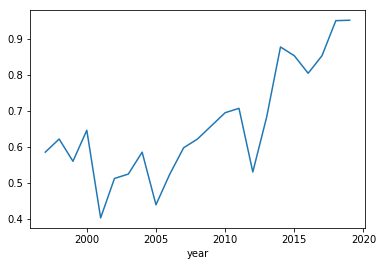

In [6]:
final.pct_games_invoked.plot()

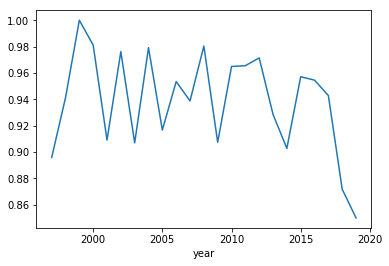

In [7]:
final.pct_law_correct.plot()

In [8]:
final.to_csv('law-by-year-clippers.csv')